In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt 
#import seqlearn

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/CICIDS2017/all_combined.csv")
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna()
df = df.reset_index()
all_data=df

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2827876 entries, 0 to 2827875
Data columns (total 79 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   index                        int64  
 1   Destination_Port             int64  
 2   Flow_Duration                int64  
 3   Total_Fwd_Packets            int64  
 4   Total_Backward_Packets       int64  
 5   Total_Length_of_Fwd_Packets  int64  
 6   Total_Length_of_Bwd_Packets  int64  
 7   Fwd_Packet_Length_Max        int64  
 8   Fwd_Packet_Length_Min        int64  
 9   Fwd_Packet_Length_Mean       float64
 10  Fwd_Packet_Length_Std        float64
 11  Bwd_Packet_Length_Max        int64  
 12  Bwd_Packet_Length_Min        int64  
 13  Bwd_Packet_Length_Mean       float64
 14  Bwd_Packet_Length_Std        float64
 15  Flow_Bytes/s                 float64
 16  Flow_Packets/s               float64
 17  Flow_IAT_Mean                float64
 18  Flow_IAT_Std                 float64
 19  

In [ ]:
## global pyplot settings -- can be changed for a specific instance
plt.rcParams['figure.figsize'] = (8, 5.28) 
plt.rcParams["axes.labelsize"] = 12
plt.rcParams["axes.titlesize"] = 13
plt.rcParams["axes.titleweight"] = 600

sns.set_color_codes("pastel")

In [ ]:
all_data.loc[:, df.isnull().any()].isnull().sum()

Series([], dtype: float64)

In [ ]:
## feature selection phase - find cols w/ all zero values 

#all_datav2.describe().iloc[1:].apply(np.sum, index=[])
describe_info = all_data.describe()
all_zeroes_cols = describe_info.loc[:,(describe_info.iloc[1:] == 0).all()]
all_zeroes_cols

,Bwd_PSH_Flags,Bwd_URG_Flags,Fwd_Avg_Bytes/Bulk,Fwd_Avg_Packets/Bulk,Fwd_Avg_Bulk_Rate,Bwd_Avg_Bytes/Bulk,Bwd_Avg_Packets/Bulk,Bwd_Avg_Bulk_Rate
count,2827876.0,2827876.0,2827876.0,2827876.0,2827876.0,2827876.0,2827876.0,2827876.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
### feature selection phase - lets's cut out features that are reduntant - all zero values 
## removing [8] features from previous cell - they are reduntant 

all_data.drop(columns=all_zeroes_cols, inplace=True)

all_data.shape # check if resulting DataFrame valid

(2827876, 71)

In [ ]:
### just rename Labels that contain non-printable characters 
print("Before...")
print(all_data.loc[:,"Label"].unique())

all_data.loc[:,"Label"].replace({"Web Attack � XSS" : "XSS", "Web Attack � Sql Injection": "Sql Injection", "Web Attack � Brute Force": "Brute Force"}, inplace=True)
print("After..")
print(all_data.loc[:,"Label"].unique())

## remove trailing && leading spaces from all the labels
rename_cols = lambda col_lbl: col_lbl.strip()
all_data.rename(rename_cols, axis=1, inplace=True, errors="raise")

Before...
['BENIGN' 'Bot' 'FTP-Patator' 'SSH-Patator' 'Infiltration' 'DoS slowloris'
 'DoS Slowhttptest' 'DoS Hulk' 'DoS GoldenEye' 'Heartbleed' 'PortScan'
 'DDoS' 'Web Attack � Brute Force' 'Web Attack � XSS'
 'Web Attack � Sql Injection']
After..
['BENIGN' 'Bot' 'FTP-Patator' 'SSH-Patator' 'Infiltration' 'DoS slowloris'
 'DoS Slowhttptest' 'DoS Hulk' 'DoS GoldenEye' 'Heartbleed' 'PortScan'
 'DDoS' 'Brute Force' 'XSS' 'Sql Injection']


In [ ]:
## temporarily add new column to distinguish traffic type between Normal / Attack 
trf_type = all_data.loc[:, "Label"].map(lambda lbl: "Normal" if lbl == "BENIGN" else "Attack")
trf_type.name = "traffic type"
all_data.loc[:, trf_type.name] = trf_type

In [ ]:
## check if column correctly added to the DataFrame

#all_data
print(all_data.shape)

(2827876, 72)


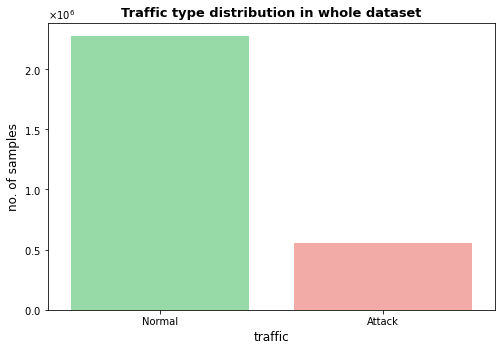

In [ ]:
#ax.yaxis.set_major_locator(locator)
#ax.yaxis.set_major_formatter(fmt)
plt.ticklabel_format(axis='y', useMathText=True, useOffset=False)  # change def ScalarFormatter

sns.countplot(x="traffic type", data=all_data, palette=["g","r"])
plt.title("Traffic type distribution in whole dataset")
# plt.title("Rozkład ruchu w całym zbiorze")
plt.xlabel("traffic")
plt.ylabel("no. of samples")
plt.savefig("/content/drive/MyDrive/Datasets/Images/distribution1.png", dpi=200, format='png')
plt.show()


In [ ]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2827876 entries, 0 to 2827875
Data columns (total 72 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   index                        int64  
 1   Destination_Port             int64  
 2   Flow_Duration                int64  
 3   Total_Fwd_Packets            int64  
 4   Total_Backward_Packets       int64  
 5   Total_Length_of_Fwd_Packets  int64  
 6   Total_Length_of_Bwd_Packets  int64  
 7   Fwd_Packet_Length_Max        int64  
 8   Fwd_Packet_Length_Min        int64  
 9   Fwd_Packet_Length_Mean       float64
 10  Fwd_Packet_Length_Std        float64
 11  Bwd_Packet_Length_Max        int64  
 12  Bwd_Packet_Length_Min        int64  
 13  Bwd_Packet_Length_Mean       float64
 14  Bwd_Packet_Length_Std        float64
 15  Flow_Bytes/s                 float64
 16  Flow_Packets/s               float64
 17  Flow_IAT_Mean                float64
 18  Flow_IAT_Std                 float64
 19  

In [ ]:
### Normal traffic greatly outweights Evil traffic. To avoid for the model to be biased towards one type of traffic, it has to be downsampled
all_data.loc[:, "traffic type"].value_counts()

## DOWNSAMPLING
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=10, sampling_strategy=0.85) # equals traffic unless ratio is specified


all_data.drop(["traffic type"], axis=1, inplace=True) # temporarily rm the categorical column for underSampling

all_data_res, trf_type_res = rus.fit_resample(all_data, trf_type)

#all_datav2 = pd.concat([all_data_res, trf_type_res], join="inner")  # another way to join dataframe w/ series
all_datav2 = all_data_res.join(trf_type_res, how="inner")

all_datav2.shape # check if resulting DaraFrame valid

(1211327, 72)

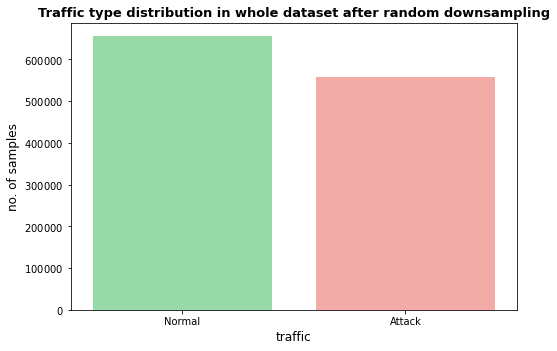

In [ ]:
plt.ticklabel_format(axis='y', useMathText=True, useOffset=False)  # change def ScalarFormatter
sns.countplot(x="traffic type", data=all_datav2, order=["Normal", "Attack"],  palette=["g","r"])

plt.title("Traffic type distribution in whole dataset after random downsampling")
# plt.title("Rozkład ruchu w całym zbiorze po próbkowaniu w dół")
plt.xlabel("traffic")
plt.ylabel("no. of samples")
plt.savefig("/content/drive/MyDrive/Datasets/Images/distribution2.png", dpi=200, format='png')
plt.show()

In [ ]:
all_datav2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1211327 entries, 0 to 1211326
Data columns (total 72 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   index                        1211327 non-null  int64  
 1   Destination_Port             1211327 non-null  int64  
 2   Flow_Duration                1211327 non-null  int64  
 3   Total_Fwd_Packets            1211327 non-null  int64  
 4   Total_Backward_Packets       1211327 non-null  int64  
 5   Total_Length_of_Fwd_Packets  1211327 non-null  int64  
 6   Total_Length_of_Bwd_Packets  1211327 non-null  int64  
 7   Fwd_Packet_Length_Max        1211327 non-null  int64  
 8   Fwd_Packet_Length_Min        1211327 non-null  int64  
 9   Fwd_Packet_Length_Mean       1211327 non-null  float64
 10  Fwd_Packet_Length_Std        1211327 non-null  float64
 11  Bwd_Packet_Length_Max        1211327 non-null  int64  
 12  Bwd_Packet_Length_Min        1211327 non-n

In [ ]:
## feature selection phase - prepare data for RFC
lbls = all_datav2.loc[:, "Label"]
data_w_o_cat_attrs = all_datav2.iloc[:, :-2]

In [ ]:
## feature selection phase - let's use RFC on our data
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=10, n_jobs=-1) # 100 trees in forest

# fit random forest classifier on the dataset
rfc.fit(data_w_o_cat_attrs, lbls)

RandomForestClassifier(n_jobs=-1, random_state=10)

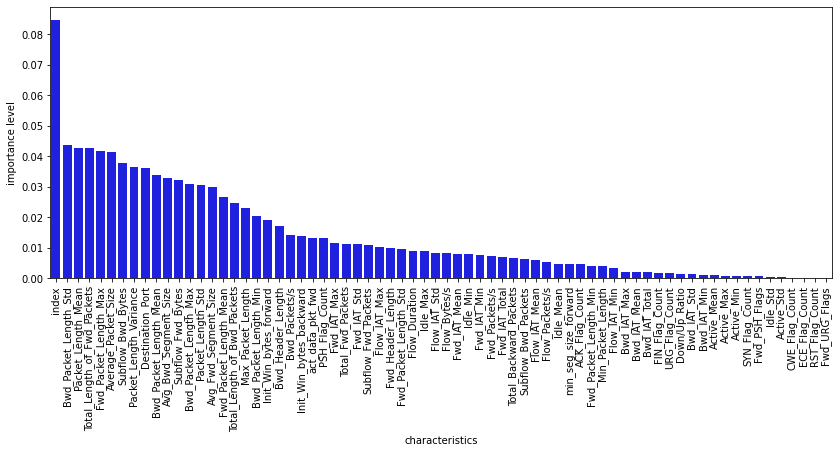

In [ ]:
## plotting features' importance in the whole dataset graph 
# extract important features
score = np.round(rfc.feature_importances_,5)
importances = pd.DataFrame({'characteristics':data_w_o_cat_attrs.columns,'importance level':score})
importances = importances.sort_values('importance level',ascending=False).set_index('characteristics')

# plot importances
sns.barplot(x=importances.index, y="importance level", data=importances, color="b")
plt.xticks(rotation="vertical")
plt.gcf().set_size_inches(14,5)
plt.savefig("/content/drive/MyDrive/Datasets/Images/importances.png", dpi=200, format='png', bbox_inches = "tight", pad_inches=0.2)
plt.show()

In [ ]:
## Let's leave only the most important features 
threshold = 0.001 # importance threshold

#bl_thresh = importances.loc[importances["importance"] < threshold]
bl_thresh = importances.loc[importances["importance level"] < threshold]
print("there are {} features to delete, as they are below chosen threshold".format(bl_thresh.shape[0]))
print("these features are the following:")
feats_to_del = [feat for feat in bl_thresh.index]
print("\n".join(feats_to_del))

## removing these not important features 
all_datav2.drop(columns=feats_to_del, inplace=True) # dropping columns

there are 11 features to delete, as they are below chosen threshold
these features are the following:
Active_Mean
Active_Max
Active_Min
SYN_Flag_Count
Fwd_PSH_Flags
Idle_Std
Active_Std
CWE_Flag_Count
ECE_Flag_Count
RST_Flag_Count
Fwd_URG_Flags


In [ ]:
## check if DataFrame still valid 
all_datav2

,index,Destination_Port,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,...,Subflow_Bwd_Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Idle_Mean,Idle_Max,Idle_Min,Label,traffic type
0,24072,8080,60202640,9,9,322,256,322,0,35.777778,...,256,29200,110,1,32,10200000.0,10200000,10100000,Bot,Attack
1,24677,8080,57891,1,1,0,0,0,0,0.000000,...,0,237,110,0,32,0.0,0,0,Bot,Attack
2,56376,8080,134812,4,3,206,134,194,0,51.500000,...,134,8192,237,3,20,0.0,0,0,Bot,Attack
3,56401,1841,84,1,1,6,6,6,6,6.000000,...,6,237,256,0,20,0.0,0,0,Bot,Attack
4,56596,8080,127781,4,3,206,134,194,0,51.500000,...,134,8192,237,3,20,0.0,0,0,Bot,Attack
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1211322,527414,53,30521,1,1,46,98,46,46,46.000000,...,98,-1,-1,0,20,0.0,0,0,BENIGN,Normal
1211323,384222,59405,3,2,0,37,0,37,0,18.500000,...,0,972,-1,0,32,0.0,0,0,BENIGN,Normal
1211324,1111629,53,455,2,2,56,612,28,28,28.000000,...,612,-1,-1,1,20,0.0,0,0,BENIGN,Normal
1211325,619409,53,183,2,2,72,264,36,36,36.000000,...,264,-1,-1,1,20,0.0,0,0,BENIGN,Normal


In [ ]:
## feature selection phase - let's find highly correlated feature pairs 
all_data_corr_mtrx = all_datav2.corr()

In [ ]:
## plotting a correlation heatmap 

plt.gcf().set_size_inches(60, 60)
hm = sns.heatmap(all_data_corr_mtrx, annot=True, linewidths=.8, annot_kws={"fontsize": 15}, fmt=".2f")
hm.set_yticklabels(hm.get_ymajorticklabels(), fontsize = 25)
hm.set_xticklabels(hm.get_xmajorticklabels(), fontsize = 25)
plt.savefig("/content/drive/MyDrive/Datasets/Images/corr_heatmap.png", dpi=200, format='png', bbox_inches = "tight", pad_inches=0.4)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# check matrix
all_data_corr_mtrx

,index,Destination_Port,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,...,Subflow_Fwd_Bytes,Subflow_Bwd_Packets,Subflow_Bwd_Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Idle_Mean,Idle_Max,Idle_Min
index,1.000000,-0.062015,-0.004694,-0.004263,-0.003986,-0.017568,-0.002930,-0.031965,-0.059765,-0.020372,...,-0.017568,-0.003986,-0.002931,-0.014033,-0.096185,-0.002599,0.003117,0.037756,0.049076,0.025433
Destination_Port,-0.062015,1.000000,-0.174934,-0.003848,-0.003425,0.015693,-0.002733,0.091117,-0.015729,0.134908,...,0.015693,-0.003425,-0.002733,-0.065654,0.209555,-0.002802,0.000670,-0.153460,-0.152286,-0.151788
Flow_Duration,-0.004694,-0.174934,1.000000,0.016391,0.014903,0.069405,0.012110,0.261905,-0.104119,0.132714,...,0.069405,0.014903,0.012110,-0.047135,-0.036211,0.012154,-0.000320,0.865057,0.879988,0.833021
Total_Fwd_Packets,-0.004263,-0.003848,0.016391,1.000000,0.998873,0.481765,0.997299,0.010694,-0.002298,0.000902,...,0.481765,0.998873,0.997291,0.003532,0.000029,0.947297,-0.000458,0.001960,0.002081,0.001791
Total_Backward_Packets,-0.003986,-0.003425,0.014903,0.998873,1.000000,0.477493,0.994948,0.010246,-0.001908,0.000519,...,0.477493,1.000000,0.994939,0.003351,-0.000001,0.944337,0.000024,0.001204,0.001226,0.001129
Total_Length_of_Fwd_Packets,-0.017568,0.015693,0.069405,0.481765,0.477493,1.000000,0.464705,0.265275,0.004173,0.245091,...,1.000000,0.477493,0.464691,0.034765,0.018441,0.506548,-0.003358,0.019182,0.022059,0.015990
Total_Length_of_Bwd_Packets,-0.002930,-0.002733,0.012110,0.997299,0.994948,0.464705,1.000000,0.007312,-0.001683,-0.001004,...,0.464705,0.994948,1.000000,0.001416,-0.000357,0.943017,0.000021,0.001178,0.001173,0.001144
Fwd_Packet_Length_Max,-0.031965,0.091117,0.261905,0.010694,0.010246,0.265275,0.007312,1.000000,0.030729,0.882481,...,0.265275,0.010246,0.007312,0.122959,0.031818,0.008826,0.000500,0.178194,0.187340,0.164437
Fwd_Packet_Length_Min,-0.059765,-0.015729,-0.104119,-0.002298,-0.001908,0.004173,-0.001683,0.030729,1.000000,0.306562,...,0.004173,-0.001908,-0.001683,-0.118477,-0.041332,-0.001488,-0.001843,-0.087988,-0.090047,-0.084205
Fwd_Packet_Length_Mean,-0.020372,0.134908,0.132714,0.000902,0.000519,0.245091,-0.001004,0.882481,0.306562,1.000000,...,0.245091,0.000519,-0.001004,0.037851,0.004824,0.000877,-0.000271,0.101703,0.113560,0.087981


In [ ]:
## process correlation matrix, list highly correlated feature pairs 
def srt_corr(mtrx):
    corr_ustack = mtrx.unstack().abs()
    #corr_ustack
    corr_srted = corr_ustack.sort_values(ascending=False)
    return corr_srted
srt_corr(all_data_corr_mtrx)

index                    index                      1.000000
Flow_Duration            Flow_Duration              1.000000
Bwd_IAT_Std              Bwd_IAT_Std                1.000000
Bwd_IAT_Mean             Bwd_IAT_Mean               1.000000
Bwd_IAT_Total            Bwd_IAT_Total              1.000000
                                                      ...   
Flow_IAT_Std             Subflow_Fwd_Packets        0.000018
Total_Backward_Packets   Init_Win_bytes_backward    0.000001
Init_Win_bytes_backward  Subflow_Bwd_Packets        0.000001
                         Total_Backward_Packets     0.000001
Subflow_Bwd_Packets      Init_Win_bytes_backward    0.000001
Length: 3481, dtype: float64

In [ ]:
from collections import OrderedDict
thres_corr = 0.95
epoch=0
highly_corr = {"dummy": "dummy"}
feats_deled = []

all_data_corr_mtrx2 = all_data_corr_mtrx.copy()  # for easy
def add_to_dct(l, ft, ft2):
    try:
        l[ft].append(ft2)
    except KeyError:
        l[ft] = [ft2]

get_imp = lambda feat: importances.loc[feat][0]
srt_key = lambda elem: get_imp(elem[0])  # gets imp of first elem

def what_to_del(dct_srt):    
    to_del = []  #least imp feature
    for k, val in dct_srt.items():
        ## get all indexes lower than current k
        feats_lw_imp = importances[importances.index.slice_indexer(k)].index
        if set(val) - set(feats_lw_imp):  # feat k creates a corr pair w/ feature of higher importance --- delete feat k
            if k not in to_del: to_del.append(k)
        else:  # feat k creates a corr pair w/ features of lower importnace --- delete one w/ lowest imp 
            for ft in feats_lw_imp[::-1]:  # searching from least important
                if ft in val and ft not in to_del:
                    to_del.append(ft)
                    break  ## deleting first founud feat of lowest possible importance
    return to_del
        
            
while highly_corr:
    count = 0
    highly_corr.clear()
    for feats, val in srt_corr(all_data_corr_mtrx2).iteritems():
        if val > thres_corr and feats[0] != feats[1]:
            count += 1
            add_to_dct(highly_corr, feats[0], feats[1])
    if not highly_corr: break  # no more highly corr pairs
    highly_corr_srt = OrderedDict(sorted(highly_corr.items(), key=srt_key))  # sorted based on imp

    to_del = what_to_del(highly_corr_srt)
    feats_deled += to_del
    epoch +=1 # first epoch will be 1 not 0! 
    print("there are {} higly correlated pairs in {} iteration".format(count, epoch))
    all_data_corr_mtrx2.drop(to_del, axis=1, inplace=True)
    all_data_corr_mtrx2.drop(to_del, axis=0, inplace=True)  # need to remove the feat from both cols and index

print("deleting: {} feature".format(len(feats_deled)))
print("finally deleted:\n"+ "\n".join(feats_deled))

there are 110 higly correlated pairs in 1 iteration
deleting: 22 feature
finally deleted:
Idle_Mean
Flow_Packets/s
Subflow_Bwd_Packets
Total_Backward_Packets
Fwd_IAT_Total
Idle_Min
Flow_IAT_Std
Idle_Max
Fwd_Packet_Length_Std
Flow_IAT_Max
Subflow_Fwd_Packets
Fwd_IAT_Std
Total_Fwd_Packets
Max_Packet_Length
Total_Length_of_Bwd_Packets
Fwd_Packet_Length_Mean
Packet_Length_Std
Bwd_Packet_Length_Max
Subflow_Fwd_Bytes
Avg_Bwd_Segment_Size
Bwd_Packet_Length_Mean
Average_Packet_Size


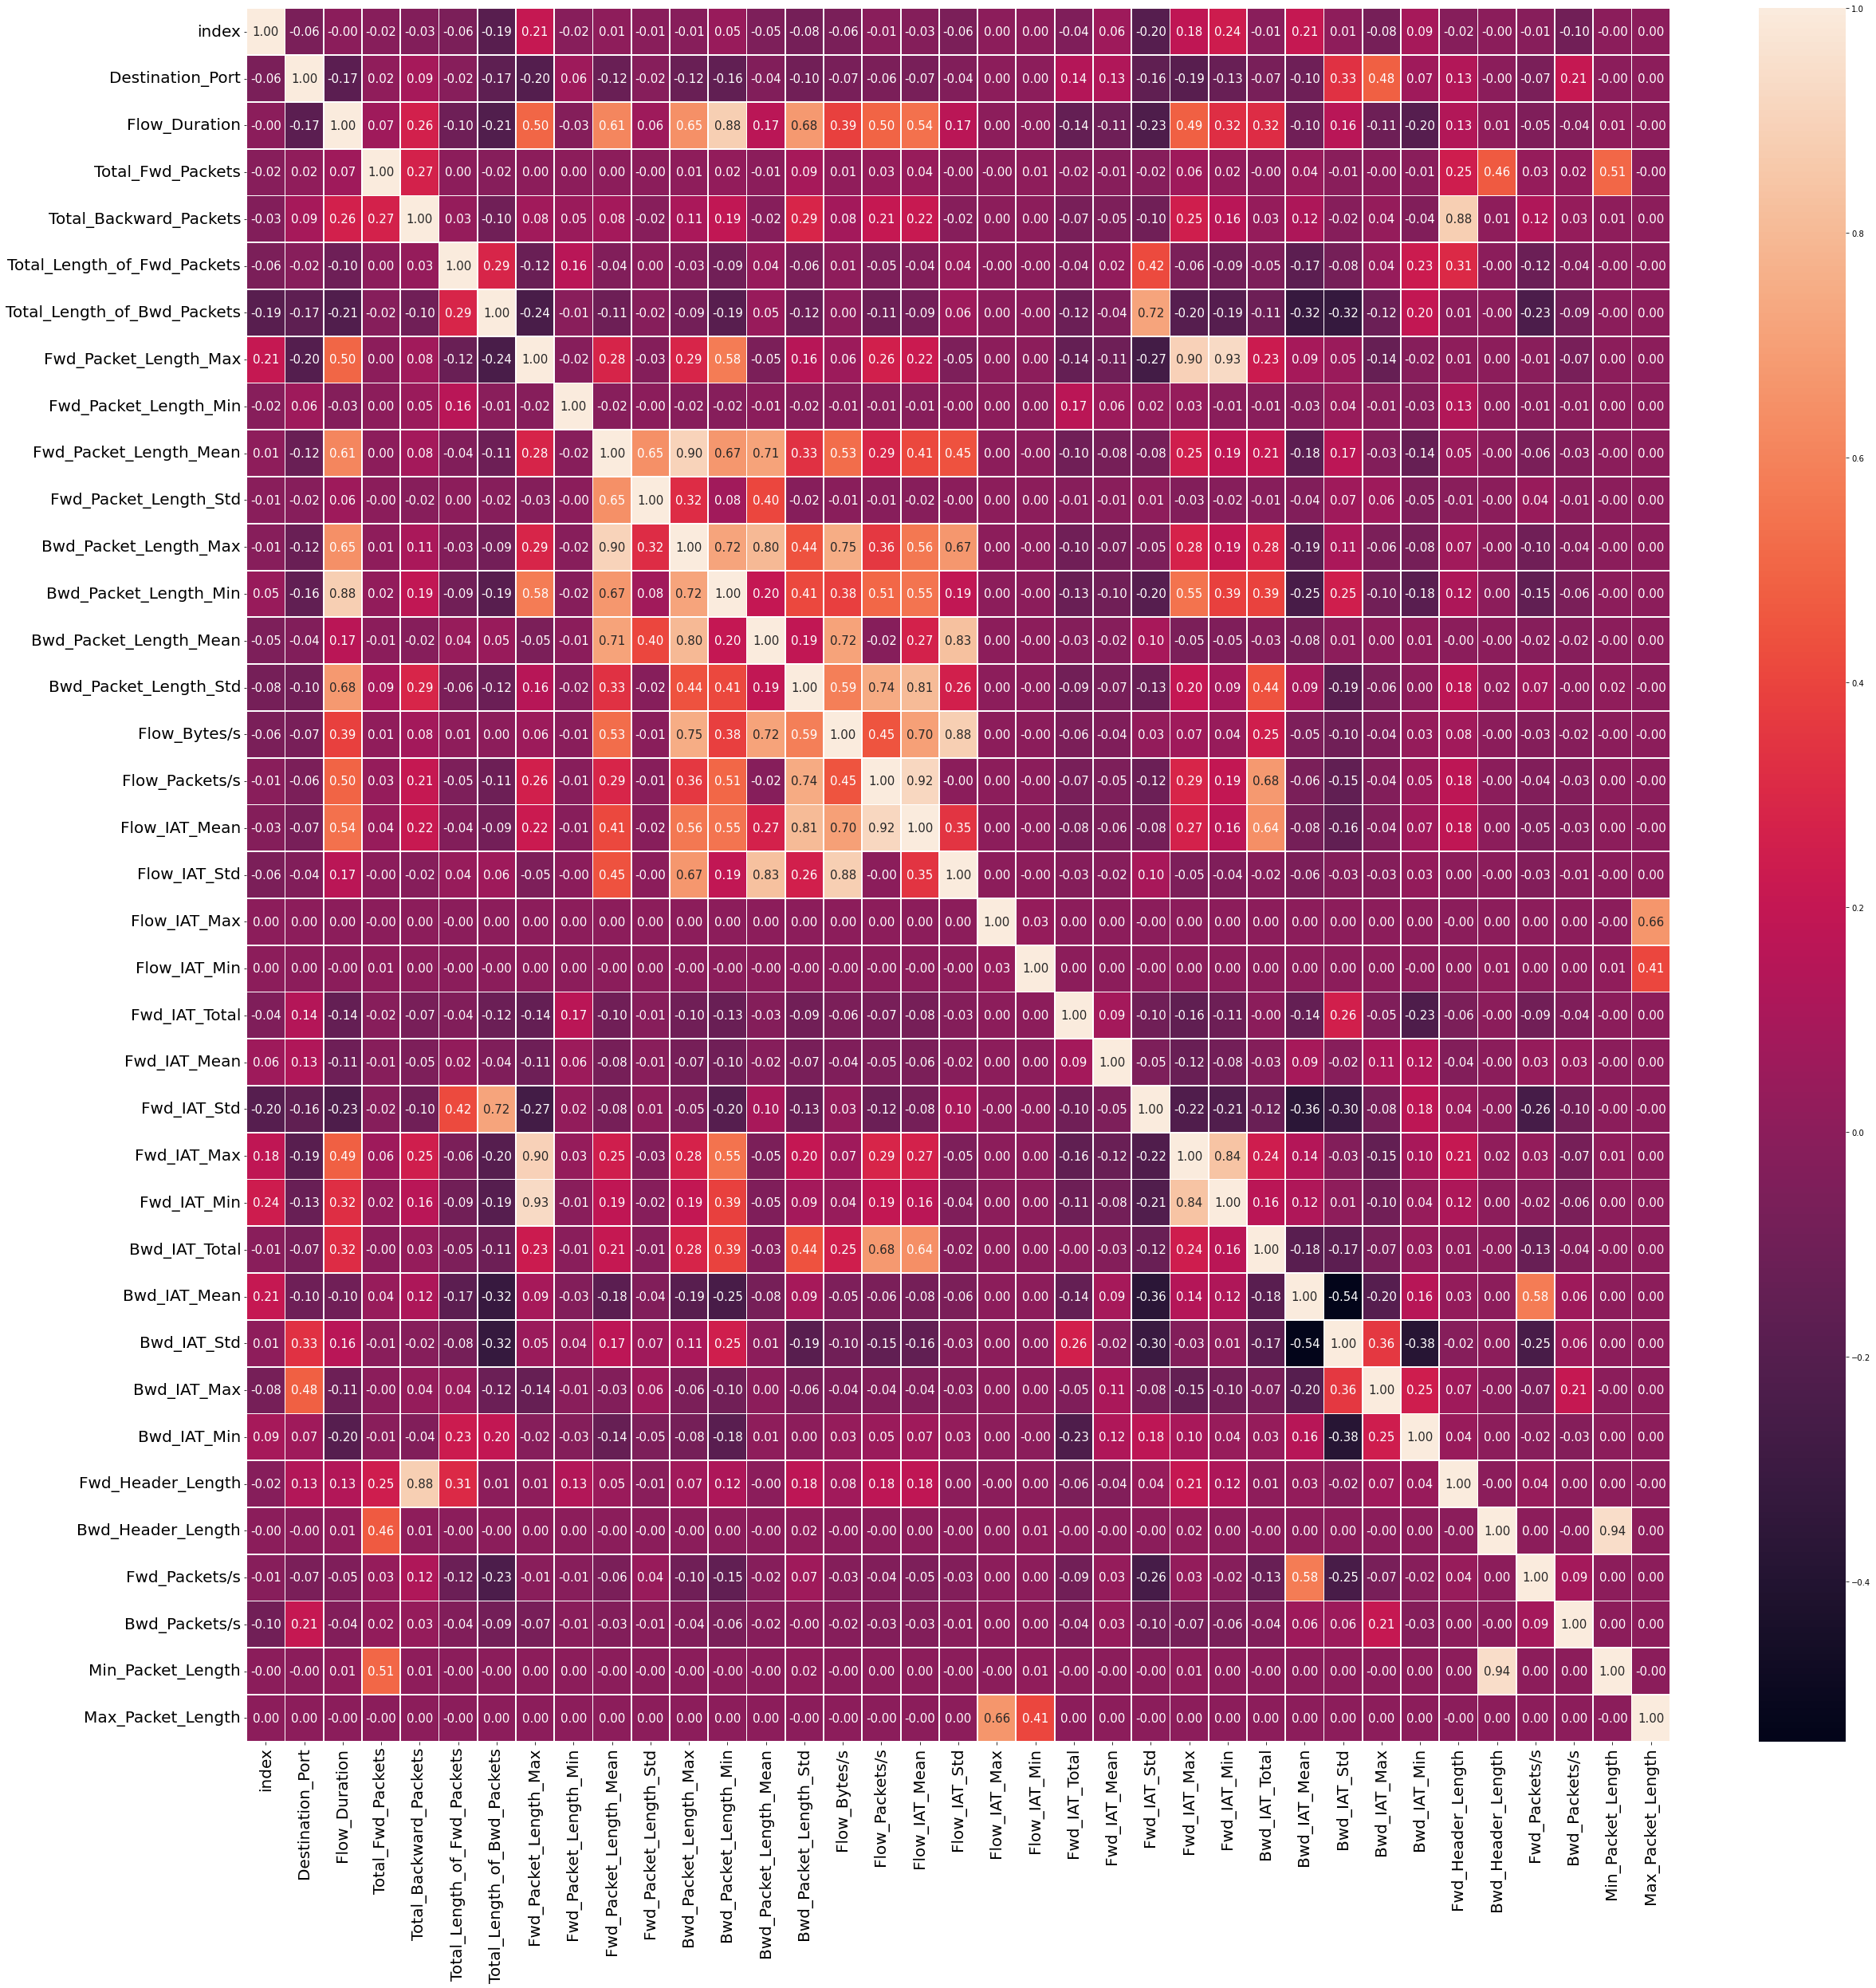

In [ ]:
## plotting a correlation heatmap after removing highly correlated pairs

plt.gcf().set_size_inches(40, 40)
hm2 = sns.heatmap(all_data_corr_mtrx2, annot=True, linewidths=.8, annot_kws={"fontsize": 15}, fmt=".2f")
hm2.set_yticklabels(hm.get_ymajorticklabels(), fontsize = 20)
hm2.set_xticklabels(hm.get_xmajorticklabels(), fontsize = 20)
plt.savefig("/content/drive/MyDrive/Datasets/Images/corr_heatmap2.png", dpi=200, format='png', bbox_inches = "tight", pad_inches=0.4)
plt.show()

In [ ]:
all_datav3 = all_datav2.copy() ## just for ease of cells executing 

all_datav3.drop(feats_deled, axis=1, inplace=True)

all_datav3_cp = all_datav3.copy()

all_datav3.info() # just check

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1211327 entries, 0 to 1211326
Data columns (total 39 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   index                        1211327 non-null  int64  
 1   Destination_Port             1211327 non-null  int64  
 2   Flow_Duration                1211327 non-null  int64  
 3   Total_Length_of_Fwd_Packets  1211327 non-null  int64  
 4   Fwd_Packet_Length_Max        1211327 non-null  int64  
 5   Fwd_Packet_Length_Min        1211327 non-null  int64  
 6   Bwd_Packet_Length_Min        1211327 non-null  int64  
 7   Bwd_Packet_Length_Std        1211327 non-null  float64
 8   Flow_Bytes/s                 1211327 non-null  float64
 9   Flow_IAT_Mean                1211327 non-null  float64
 10  Flow_IAT_Min                 1211327 non-null  int64  
 11  Fwd_IAT_Mean                 1211327 non-null  float64
 12  Fwd_IAT_Max                  1211327 non-n

In [ ]:
list(all_datav3)

['index',
 'Destination_Port',
 'Flow_Duration',
 'Total_Length_of_Fwd_Packets',
 'Fwd_Packet_Length_Max',
 'Fwd_Packet_Length_Min',
 'Bwd_Packet_Length_Min',
 'Bwd_Packet_Length_Std',
 'Flow_Bytes/s',
 'Flow_IAT_Mean',
 'Flow_IAT_Min',
 'Fwd_IAT_Mean',
 'Fwd_IAT_Max',
 'Fwd_IAT_Min',
 'Bwd_IAT_Total',
 'Bwd_IAT_Mean',
 'Bwd_IAT_Std',
 'Bwd_IAT_Max',
 'Bwd_IAT_Min',
 'Fwd_Header_Length',
 'Bwd_Header_Length',
 'Fwd_Packets/s',
 'Bwd_Packets/s',
 'Min_Packet_Length',
 'Packet_Length_Mean',
 'Packet_Length_Variance',
 'FIN_Flag_Count',
 'PSH_Flag_Count',
 'ACK_Flag_Count',
 'URG_Flag_Count',
 'Down/Up_Ratio',
 'Avg_Fwd_Segment_Size',
 'Subflow_Bwd_Bytes',
 'Init_Win_bytes_forward',
 'Init_Win_bytes_backward',
 'act_data_pkt_fwd',
 'min_seg_size_forward',
 'Label',
 'traffic type']

In [ ]:
## scaling numerical data using Quantile scaling
from sklearn.preprocessing import QuantileTransformer
qt = QuantileTransformer(random_state=10) # number of quantiles can be set, default n_quantiles=1000

att_type = all_datav3.loc[:, "Label"]
bin_trff_type = all_datav3.loc[:, "traffic type"]
all_datav3.drop(["Label", "traffic type"], axis=1, inplace=True) ## drop categorical columns
all_data_scled = qt.fit_transform(all_datav3)

all_data_scled ## check 

array([[0.00534329, 0.86286286, 0.80543697, ..., 0.60510511, 0.51551552,
        0.72722723],
       [0.00547422, 0.86286286, 0.52660002, ..., 0.60510511, 0.        ,
        0.72722723],
       [0.01299483, 0.86286286, 0.58900444, ..., 0.85785786, 0.80980981,
        0.22922923],
       ...,
       [0.27405767, 0.13413413, 0.38102102, ..., 0.        , 0.51551552,
        0.22922923],
       [0.14859252, 0.13413413, 0.31531532, ..., 0.        , 0.51551552,
        0.22922923],
       [0.15125164, 0.13413413, 0.47139516, ..., 0.        , 0.51551552,
        0.72722723]])

In [ ]:
### splitting dataset into training and test set 
from sklearn.model_selection import train_test_split

train_data, test_data, train_lbl, test_lbl  = train_test_split(all_data_scled, att_type, random_state=10, train_size=0.7)
## additional held-out validation set for evaluating neural nets predicting on upsampled training set --- the validation set need to be split b4 upsampling
neural_train_data, neural_validation, neural_train_lbl, neural_validation_lbl = train_test_split(train_data, train_lbl, random_state=10, train_size=0.8) ## will be shuffled in the same order as train_data above

train_bin_trff_lbl = train_lbl.map(lambda lbl: "Normal" if lbl == "BENIGN" else "Attack") 
neural_train_bin_trff_lbl = neural_train_lbl.map(lambda lbl: "Normal" if lbl == "BENIGN" else "Attack") ## train_lbl for upsampled neural nets
test_bin_trff_lbl = test_lbl.map(lambda lbl: "Normal" if lbl == "BENIGN" else "Attack") 
neural_validation_bin_trff_lbl = neural_validation_lbl.map(lambda lbl: "Normal" if lbl == "BENIGN" else "Attack") ## validation lbl for upsampled neural nets

In [ ]:
## check the current distribution of each traffic type in training set
a = train_lbl.value_counts()
all_samples = a.sum()
print(a)
print("Total: {}".format(all_samples))

BENIGN              458225
DoS Hulk            161185
PortScan            111128
DDoS                 89792
DoS GoldenEye         7196
FTP-Patator           5496
SSH-Patator           4051
DoS slowloris         4031
DoS Slowhttptest      3901
Bot                   1358
Brute Force           1066
XSS                    456
Infiltration            22
Sql Injection           14
Heartbleed               7
Name: Label, dtype: int64
Total: 847928


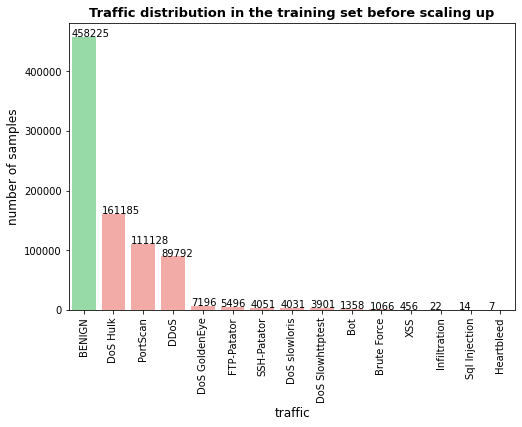

In [ ]:
## traffic type distribution in training set before oversampling
order = a.index
palette = {}
for key in order:
    palette[key] = "g" if key == "BENIGN" else "r"
ax = sns.countplot(x=train_lbl, order=order, palette=palette)
plt.xticks(rotation="vertical")
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x(), p.get_height()))
    
plt.title("Traffic distribution in the training set before scaling up")
plt.xlabel("traffic")
plt.ylabel("number of samples")
plt.savefig("/content/drive/MyDrive/Datasets/Images/distribution_up1.png", dpi=200, format='png', bbox_inches = "tight")
plt.show()

In [ ]:
## TEST CELL ONLY
train_lbl.value_counts().loc["BENIGN"]

458225

In [ ]:
## The distribution of each category is very imbalanced -- usign OverSampling to even the distribution
## oversampling only the training set so that not to leak information (important patterns) to the test dataset
from imblearn.over_sampling import SMOTE
from math import ceil
min_thresh = 0.005  # it is a percent of the whole traffic after underSampling

glob_cls_distr = None
def over_sample_new(y):
    global glob_cls_distr
    cls_distr = {}
    for trf_cls in np.unique(y):
        curr_size = a.loc[trf_cls]  # global a == train_lbl.value_counts()
        if (curr_size / all_samples) < min_thresh:
            cls_distr[trf_cls] = ceil(min_thresh * all_samples)
        else:
            cls_distr[trf_cls] = curr_size
    print("class distribution after over sampling:")
    glob_cls_distr = cls_distr
    print(glob_cls_distr)
    return cls_distr

def over_sample_bin(dct):
    sm = 0
    for key, val in dct.items():
        if key != "BENIGN":
            sm += val
        else: benign = val
    return {"Normal": benign, "Attack": sm}

#dct = {'FTP-Patator': 7935, 'SSH-Patator': 6057, 'DoS slowloris': 6057, 'DoS Slowhttptest': 6057, 'DoS Hulk': 230124, 'DoS GoldenEye': 10293, 'Heartbleed': 6057, 'Brute Force': 6057, 'XSS': 6057, 'Sql Injection': 6057, 'Infiltration': 6057, 'DDoS': 128025, 'PortScan': 158804, 'Bot': 6057, 'BENIGN': 654771}
smote = SMOTE(random_state=10, k_neighbors=3, sampling_strategy=over_sample_new, n_jobs=-1)  # todo can resample w/ k_neigh only for heartbleed
#print(glob_cls_distr)

up_train_data, up_train_lbl = smote.fit_resample(train_data, train_lbl)

#up_train_bin_trff_lbl = up_train_lbl.map(lambda lbl: "Normalny" if lbl == "BENIGN" else "Atak")  # invalid way to oversample binary traffic


class distribution after over sampling:
{'BENIGN': 458225, 'Bot': 4240, 'Brute Force': 4240, 'DDoS': 89792, 'DoS GoldenEye': 7196, 'DoS Hulk': 161185, 'DoS Slowhttptest': 4240, 'DoS slowloris': 4240, 'FTP-Patator': 5496, 'Heartbleed': 4240, 'Infiltration': 4240, 'PortScan': 111128, 'SSH-Patator': 4240, 'Sql Injection': 4240, 'XSS': 4240}


In [ ]:
## same as above but done for the neural nets multiouput classification (need to held out additional validation set b4 upsampling)
neural_thresh = 0.005  # it is a percent of the whole traffic [neural_train_data] after underSampling

neural_glob_cls_distr = None
def over_sample_neural(y):
    all_samples = neural_train_lbl.value_counts().sum()
    global neural_glob_cls_distr
    cls_distr = {}
    for trf_cls in np.unique(y):
        curr_size = neural_train_lbl.value_counts().loc[trf_cls]
        if (curr_size / all_samples) < neural_thresh:
            cls_distr[trf_cls] = ceil(neural_thresh * all_samples)
        else:
            cls_distr[trf_cls] = curr_size
    print("class distribution after over sampling for neural nets:")
    neural_glob_cls_distr = cls_distr
    print(neural_glob_cls_distr)
    return cls_distr

neural_smote = SMOTE(random_state=10, k_neighbors=2, sampling_strategy=over_sample_neural, n_jobs=-1)  # todo can resample w/ k_neigh only for heartbleed
up_neural_train_data, up_neural_train_lbl = neural_smote.fit_resample(neural_train_data, neural_train_lbl)

class distribution after over sampling for neural nets:
{'BENIGN': 366384, 'Bot': 3392, 'Brute Force': 3392, 'DDoS': 72033, 'DoS GoldenEye': 5695, 'DoS Hulk': 128893, 'DoS Slowhttptest': 3392, 'DoS slowloris': 3392, 'FTP-Patator': 4362, 'Heartbleed': 3392, 'Infiltration': 3392, 'PortScan': 89056, 'SSH-Patator': 3392, 'Sql Injection': 3392, 'XSS': 3392}


In [ ]:
## upsampling minority data in the case of classification between of Normal / Evil traffic
## Attack samples should be equal to the sum of all attacks after upsampling in the previous step
#ratio = get_sum(glob_cls_distr) / a.loc["BENIGN"]  # minority class after resampling over majority class
ratio = over_sample_bin(glob_cls_distr)
#print(ratio)
smote_bin = SMOTE(random_state=10, k_neighbors=3, sampling_strategy=ratio, n_jobs=-1)
up_train_bin_data, up_train_bin_trff_lbl = smote_bin.fit_resample(train_data, train_bin_trff_lbl)

In [ ]:
## same as above but done for neural nets binary classification (need to keep additional validation set b4 upsampling)
neural_ratio = over_sample_bin(neural_glob_cls_distr)
#print(ratio)
neural_smote_bin = SMOTE(random_state=10, k_neighbors=3, sampling_strategy=neural_ratio, n_jobs=-1)
up_neural_train_bin_data, up_neural_train_bin_trff_lbl = neural_smote_bin.fit_resample(neural_train_data, neural_train_bin_trff_lbl)

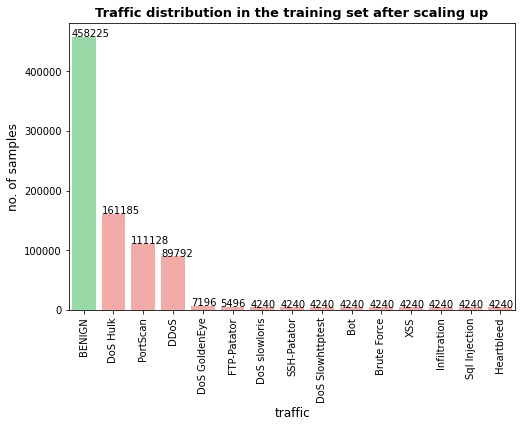

In [ ]:
## traffic type distribution in training set after oversampling
order = ['BENIGN', 'DoS Hulk', 'PortScan', 'DDoS', 'DoS GoldenEye',
       'FTP-Patator', 'DoS slowloris', 'SSH-Patator', 'DoS Slowhttptest',
       'Bot', 'Brute Force', 'XSS', 'Infiltration', 'Sql Injection',
       'Heartbleed']
palette = {}
for key in order:
    palette[key] = "g" if key == "BENIGN" else "r"
ax = sns.countplot(x=up_train_lbl, order=order, palette=palette)
plt.xticks(rotation="vertical")
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x(), p.get_height()))
    
plt.title("Traffic distribution in the training set after scaling up")
plt.xlabel("traffic")
plt.ylabel("no. of samples")
plt.savefig("/content/drive/MyDrive/Datasets/Images/distribution_up2.png", dpi=200, format='png', bbox_inches = "tight")
plt.show()

In [ ]:
## encoding labels using OneHotEncoder. Attack types should not imply any hierachical relation between them 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

test_rshped = test_lbl.values.reshape(-1,1)
train_rshped = train_lbl.values.reshape(-1,1)
up_train_rshped = up_train_lbl.values.reshape(-1,1)
up_neural_train_rshped = up_neural_train_lbl.values.reshape(-1,1)
neural_validation_rshped = neural_validation_lbl.values.reshape(-1,1)


# cats = np.array(['BENIGN', 'DoS Hulk', 'DDoS', 'PortScan', 'DoS slowloris',
#        'Brute Force', 'DoS GoldenEye', 'Bot', 'DoS Slowhttptest',
#        'SSH-Patator', 'FTP-Patator', 'XSS', 'Sql Injection',
#        'Infiltration', 'Heartbleed'])
ohenc = OneHotEncoder()
lenc = LabelEncoder()

test_lbl_enc = ohenc.fit_transform(test_rshped).toarray()  # one-hot encoded test set lbls
train_lbl_enc = ohenc.fit_transform(train_rshped).toarray()  # one-hot encoded train set labels
up_train_lbl_enc = ohenc.fit_transform(up_train_rshped).toarray()  # one-hot encoded upsampled train set lbls
up_neural_train_lbl_enc = ohenc.fit_transform(up_neural_train_rshped).toarray()  # one-hot encoded upsampled train set lbls for neural nets predicting upsampled traffic
neural_validation_lbl_enc = ohenc.fit_transform(neural_validation_rshped).toarray()  # one-hot encoded neural nets validation set for multiouput classification

test_bin_trff_lbll_enc = lenc.fit_transform(test_bin_trff_lbl)  # label encoded test set binary lbls
train_bin_trff_lbll_enc = lenc.fit_transform(train_bin_trff_lbl) # label encoded train set binary lbls
up_train_bin_trff_lbl_enc = lenc.fit_transform(up_train_bin_trff_lbl)  # label encoded upsampled train set binary lbls
up_neural_train_bin_trff_lbl_enc = lenc.fit_transform(up_neural_train_bin_trff_lbl)  # label encoded upsampled train set binary lbls for neural nets predicting upsampled traffic
neural_validation_bin_trff_lbl_enc = lenc.fit_transform(neural_validation_bin_trff_lbl)  # label encoded neural nets validation set for binary classification

In [ ]:
## saving output for future use 
pd.DataFrame(train_data).to_csv("/content/drive/MyDrive/Datasets/CSVs/train_set_df.csv", index=False)  # raw train set
pd.DataFrame(up_train_data).to_csv("/content/drive/MyDrive/Datasets/CSVs/upsmpl_train_set_df.csv", index=False) # upsampled train set for multi-output classification
pd.DataFrame(up_neural_train_data).to_csv("/content/drive/MyDrive/Datasets/CSVs/upsmpl_neural_train_set_df.csv", index=False) # upsampled train set for multi-output classification for neural nets
pd.DataFrame(up_train_bin_data).to_csv("/content/drive/MyDrive/Datasets/CSVs/upsmpl_train_bin_set_df.csv", index=False)  # upsampled train set for binary classification
pd.DataFrame(up_neural_train_bin_data).to_csv("/content/drive/MyDrive/Datasets/CSVs/upsmpl_neural_train_bin_set_df.csv", index=False)  # upsampled train set for binary classification for neural nets
pd.DataFrame(test_data).to_csv("/content/drive/MyDrive/Datasets/CSVs/test_set_df.csv", index=False)  #raw test set

train_lbl.to_csv("/content/drive/MyDrive/Datasets/CSVs/train_lbl.csv")  # raw labels for multi-output classification
up_train_lbl.to_csv("/content/drive/MyDrive/Datasets/CSVs/upsmpl_train_lbl.csv")  # raw lbls for upsampled multi-output classification
pd.DataFrame(data=train_lbl_enc).to_csv("/content/drive/MyDrive/Datasets/CSVs/train_lbl_enc.csv", index=False) # one-hot encoded labels for multi-output classification
pd.DataFrame(data=up_train_lbl_enc).to_csv("/content/drive/MyDrive/Datasets/CSVs/upsmpl_train_lbl_enc.csv", index=False) # one-hot encoded lbls for upsampled multi-output classification
pd.DataFrame(data=up_neural_train_lbl_enc).to_csv("/content/drive/MyDrive/Datasets/CSVs/upsmpl_neural_train_lbl_enc.csv", index=False) # one-hot encoded lbls for upsampled multi-output classification 4 neural

test_lbl.to_csv("/content/drive/MyDrive/Datasets/CSVs/test_lbl.csv")  # raw test labels for multi-output classification
pd.DataFrame(data=test_lbl_enc).to_csv("/content/drive/MyDrive/Datasets/CSVs/test_lbl_enc.csv", index=False)  # one-hot encoded test lbls for multi-ouput classification

train_bin_trff_lbl.to_csv("/content/drive/MyDrive/Datasets/CSVs/train_bin_trff_lbl.csv")  # raw lbls for binary classification
up_train_bin_trff_lbl.to_csv("/content/drive/MyDrive/Datasets/CSVs/upsmpl_train_bin_trff_lbl.csv")  # raw lbls for upsampled binary classification
pd.DataFrame(data=train_bin_trff_lbll_enc).to_csv("/content/drive/MyDrive/Datasets/CSVs/train_bin_trff_lbl_enc.csv", index=False)  # label encoded lbls for binary classification
pd.DataFrame(data=up_train_bin_trff_lbl_e78nc).to_csv("/content/drive/MyDrive/Datasets/CSVs/upsmpl_train_bin_trff_lbl_enc.csv", index=False)  # label encoded lbls for upsampled binary classification
pd.DataFrame(data=up_neural_train_bin_trff_lbl_enc).to_csv("/content/drive/MyDrive/Datasets/CSVs/upsmpl_neural_train_bin_trff_lbl_enc.csv", index=False)  # label encoded lbls for upsampled binary classification 4 neural

test_bin_trff_lbl.to_csv("/content/drive/MyDrive/Datasets/CSVs/test_bin_trff_lbl.csv")  # raw test lbls for binary classification
pd.DataFrame(data=test_bin_trff_lbll_enc).to_csv("/content/drive/MyDrive/Datasets/CSVs/test_bin_trff_lbl_enc.csv", index=False)  # label encoded test lbls for binary classification 

pd.DataFrame(neural_validation).to_csv("/content/drive/MyDrive/Datasets/CSVs/neural_validation.csv", index=False)  # validation set for neural nets predicting on upsampled training set
pd.DataFrame(data=neural_validation_bin_trff_lbl_enc).to_csv("/content/drive/MyDrive/Datasets/CSVs/neural_validation_bin_trff_lbl_enc.csv", index=False)  # label encoded validation set lbl 4 neural 4 binary 
pd.DataFrame(data=neural_validation_lbl_enc).to_csv("/content/drive/MyDrive/Datasets/CSVs/neural_validation_lbl_enc", index=False)  # one-hot encoded validation set lbl 4 neural 4 multioutput classification

In [ ]:
#Y_train = df.read_csv("/content/drive/MyDrive/Datasets/CSVs/upsmpl_neural_train_bin_trff_lbl_enc.csv")
#X_train = df.read_csv("/content/drive/MyDrive/Datasets/CSVs/upsmpl_neural_train_bin_set_df.csv")